In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys

sys.path.append("..")

from src.utils import read_yaml, read_tiff, save_yaml, fix_relative_paths

from src.metrics import evaluate_metrics,evaluate_component_metrics

# from main import compile_metrics

import os

import pandas as pd
import numpy as np

import shutil

from glob import glob

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.express as px

from os.path import join
import yaml
sns.set_style("whitegrid")

## Utils

In [3]:
args = read_yaml("../args.yaml")
fix_relative_paths(args)

# Carregando Métricas

In [4]:
ROOT_PATH = r"C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn"
version_folders = pd.Series(os.listdir(ROOT_PATH))
version_folders = version_folders[version_folders.str.endswith("_version_data")].sort_values()

version_folders = ROOT_PATH +"/"+ version_folders+"/"

In [5]:
test_labels = read_tiff("../input_data/segmentation/samples_A1_test2tif.tif")

In [6]:
# Create a dataframe with all the iteration folders
paths = []
for version_folder in version_folders.values:

    iter_folders =  pd.Series(os.listdir(version_folder))

    iter_folders = iter_folders[iter_folders.str.startswith("iter_") & ~ iter_folders.str.endswith("000")]
    
    iter_folders = version_folder + iter_folders
    
    iter_folders = iter_folders.sort_values().tolist()
    
    iter_folders.pop()
    
    for iter_folder in iter_folders:
        row = dict(iter_folder = iter_folder, version_folder = version_folder)
        paths.append(row)  


# Create Data Frame
df_iter_path = pd.DataFrame(paths)

df_iter_path["version"] = df_iter_path['iter_folder'].str.split("/").str[-2].str.split("_").str[0].astype(float)

df_iter_path["iter"] = df_iter_path['iter_folder'].str.split("/").str[-1].str.split("_").str[-1].astype(int)

df_iter_path.sort_values(["version", 'iter'], inplace = True)

In [7]:
metrics_raw = []
labels_metrics_raw = []

for version_folder in version_folders.values:

    iter_folders =  pd.Series(os.listdir(version_folder))

    iter_folders = iter_folders[iter_folders.str.startswith("iter_") & ~ iter_folders.str.endswith("000")]
    
    iter_folders = version_folder+iter_folders
    
    iter_folders = iter_folders.sort_values().tolist()
    
    iter_folders.pop()
    
    for iter_folder in iter_folders:
        # generate component metrics
        print(iter_folder)
        labels_test_metrics = os.path.join(iter_folder,'all_labels_test_metrics.yaml')
        
        # # selected_labels = read_tiff(os.path.join(iter_folder, "new_labels", "selected_labels_set.tif"))
        # all_labels = read_tiff(os.path.join(iter_folder, "new_labels", "all_labels_set.tif"))

        # all_labels_metrics = evaluate_component_metrics(test_labels, all_labels, 14)
    
        # save_yaml(all_labels_metrics, labels_test_metrics)

        test_metrics = os.path.join(iter_folder, "test_metrics.yaml")
        
        iter_metric = read_yaml(test_metrics)
        
        iter_metric['iter_folder'] = iter_folder
        
        metrics_raw.append(iter_metric)



        labels_test_metrics = os.path.join(iter_folder,'all_labels_test_metrics.yaml')
        
        label_iter_metric = read_yaml(labels_test_metrics)
        
        label_iter_metric["iter_folder"] = iter_folder

        labels_metrics_raw.append(label_iter_metric)

        
    

C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/1.0_version_data/iter_001
C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/1.0_version_data/iter_002
C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/10.0_version_data/iter_001
C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/10.0_version_data/iter_002
C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/10.0_version_data/iter_003
C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/10.0_version_data/iter_004
C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/10.0_version_data/iter_005
C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/11.0_version_data/iter_001
C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/11.0_version_data/iter_002
C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/11.0_version_data/iter_003
C:\Users\ziull\OneDrive\Documentos\Estudos\TCC\multi-task-fcn/11.0_version_data/iter_004
C:\Users\ziull\OneDrive

In [8]:
df_metrics = pd.DataFrame(metrics_raw)

df_metrics["version"] = df_metrics['iter_folder'].str.split("/").str[-2].str.split("_").str[0].astype(float)

df_metrics["iter"] = df_metrics['iter_folder'].str.split("/").str[-1].str.split("_").str[-1].astype(int)

df_metrics.sort_values(["version", 'iter'], inplace = True)

In [9]:
df_label_metrics = pd.DataFrame(labels_metrics_raw)

df_label_metrics["version"] = df_label_metrics['iter_folder'].str.split("/").str[-2].str.split("_").str[0].astype(float)

df_label_metrics["iter"] = df_label_metrics['iter_folder'].str.split("/").str[-1].str.split("_").str[-1].astype(int)

df_label_metrics.sort_values(["version", "iter"], inplace = True)

# Visões comparativas

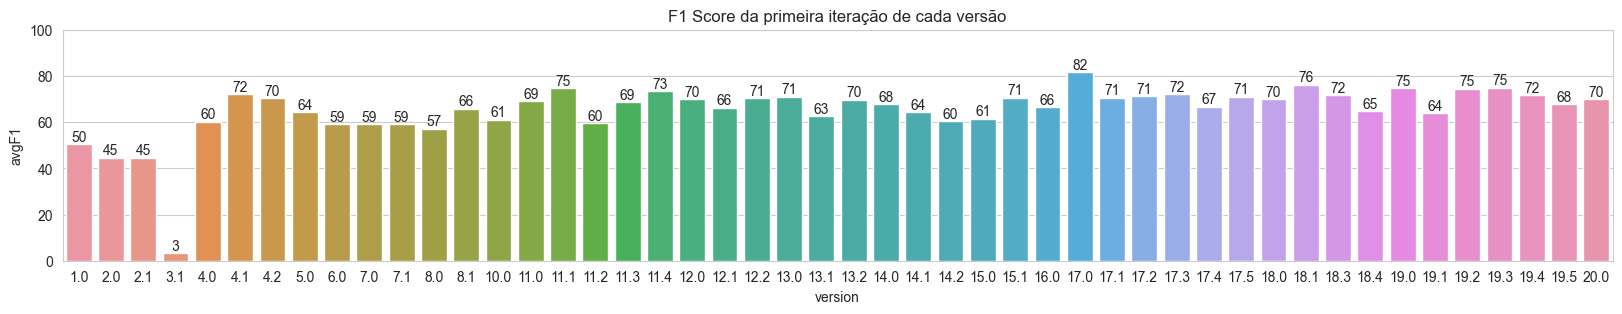

In [10]:
plt.figure(figsize= (df_metrics["iter"].nunique(), 3))

g = sns.barplot(
    data = df_metrics[df_metrics["iter"] == 1],
    x = "version",
    y = "avgF1"
)

g.set_title("F1 Score da primeira iteração de cada versão")

g.bar_label(g.containers[0], fmt = "{:.0f}")

plt.ylim(0, 100)

plt.show()

- Modelo Usado:
    - DeepVlab3

Com base nesses resultados, temos um panorama de quais testes melhoraram os resultados do modelo na primeira iteração:

Sobre alterações que impactam a primeira iteração do modelo:

- 1.0 : Normalização por Standadrd Scaler
- 3.0 : Mudança da loss para focal loss com gamma 2

- 4.0 : Data Augmentation: 
        Random Flip, Random Rotate e Random Crop Sem Resize

- 5.0 : Inícios dos pesos aleatoriamente
- 12.0 : Uso da Focal Loss com gamma 1.5
- 13.0 : Uso de dropout na task de classificação e na task auxiliar
- 14.2 :  Diminuição do filtro gaussiano do primeiro distance map de 5 para 1.

In [11]:
df_metrics["diffF1"] = df_metrics.groupby(["version"])["avgF1"].diff()

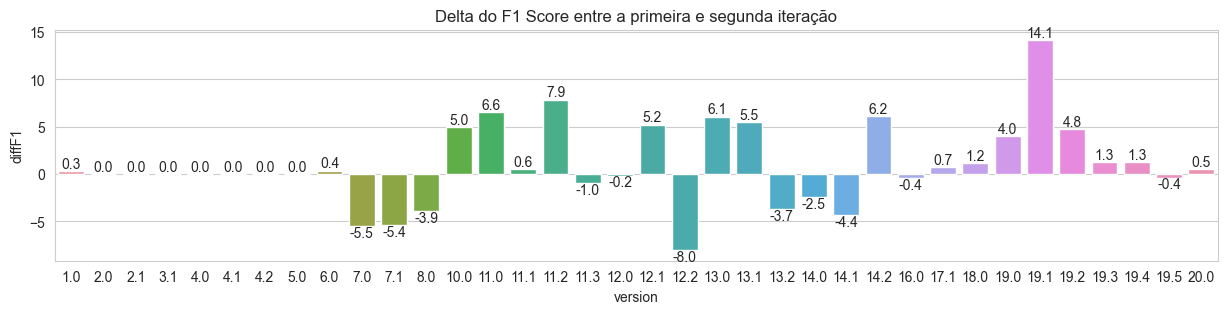

In [12]:
plt.figure(figsize= (15, 3))

g = sns.barplot(
    data = df_metrics[df_metrics["iter"] == 2],
    x = "version",
    y = "diffF1"
)

g.set_title("Delta do F1 Score entre a primeira e segunda iteração")

g.bar_label(g.containers[0], fmt = "{:.1f}")

plt.show()


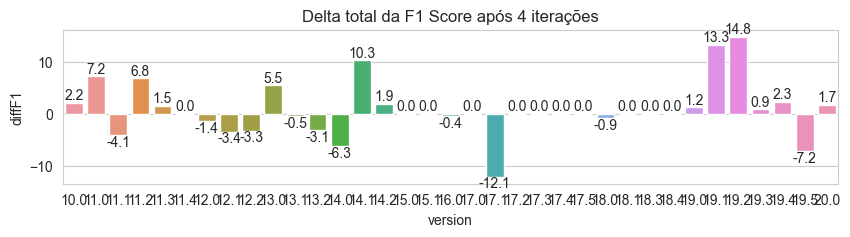

In [13]:
plt.figure(figsize= (10, 2))

g = sns.barplot(
    data = df_metrics[(df_metrics["version"] >= 10) & (df_metrics["iter"] <= 4)].groupby("version", as_index=False)["diffF1"].sum(),
    x = "version",
    y = "diffF1"
)
g.set_title("Delta total da F1 Score após 4 iterações")
g.bar_label(g.containers[0], fmt = "{:.1f}")

plt.show()


Versão 10.0:
- Mapa de probabilidade (filtro_gaussiando) + Mapa de Distâncias (filtro_gaussiando) > 1.2
- Início do modelo com pesos da imagenet

Versão 11.0:
- Seleção prévia dos componentes com probabilidade maior que 0.95
- Uso do filtro (distance_map+probability_map) > 1.3
- Random rotate limitado a 0, 90, 180, 270

Versão 12.0
- Mudança do Gamma da Focal Loss para 1.5

Versão 13.0
- Uso de dropout até 0.65 nos classificadores

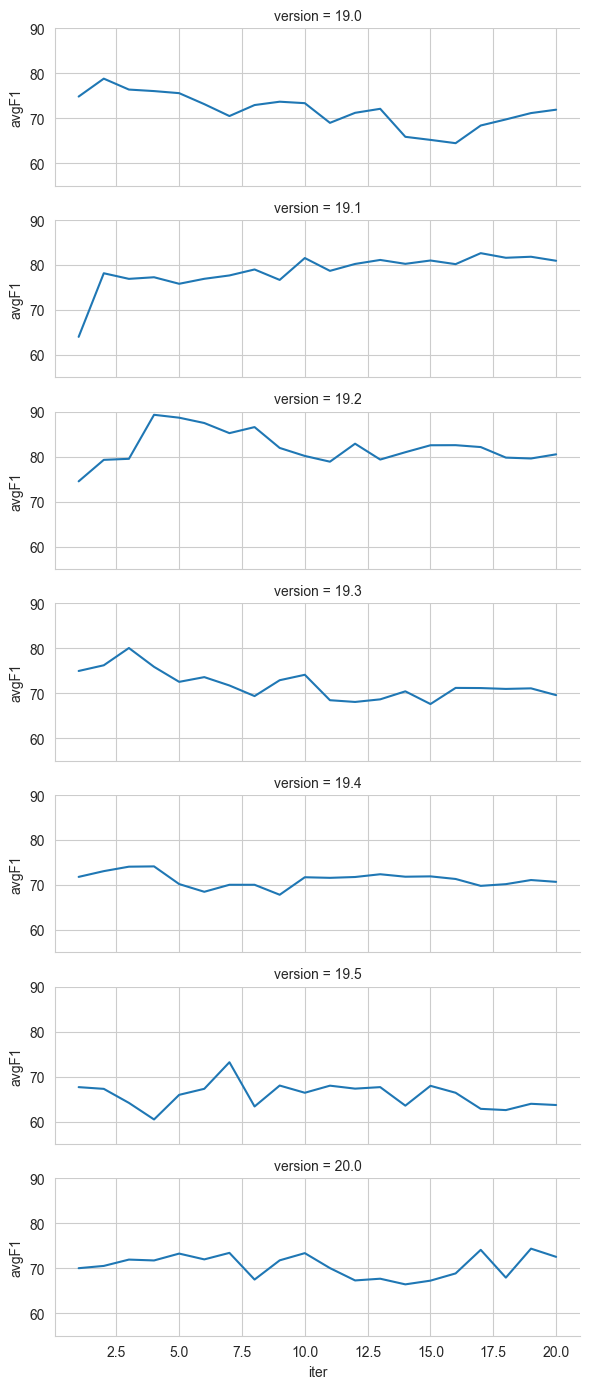

In [14]:
g = sns.FacetGrid(
    df_metrics[df_metrics["version"]>=19],
    row = "version",
    height = 2,
    aspect = 3,
    # xlim=(1,10),
    ylim=(55, 90)
)

g.map(sns.lineplot, "iter", "avgF1")


# Análise das métricas relacionadas a seleção de componentes

Nessas análises focamos em entender se os componentes selecionados com alta confiança pelo modelo estão conseguindo gerar componentes com o formato adequado

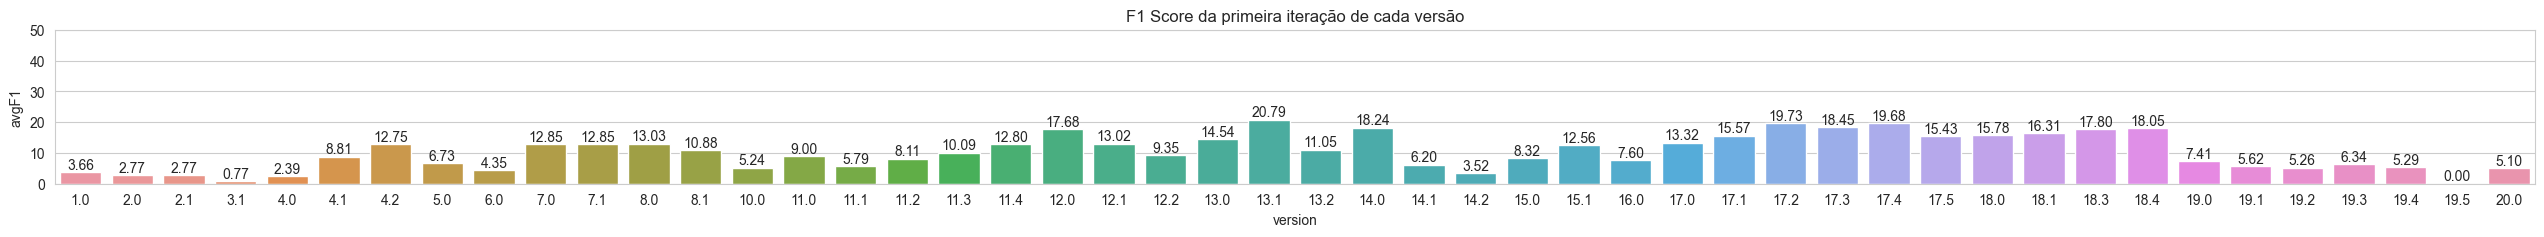

In [15]:
plt.figure(figsize= (df_label_metrics["version"].nunique()//1.5, 2))

g = sns.barplot(
    data = df_label_metrics[df_label_metrics["iter"] == 1],
    x = "version",
    y = "avgF1"
)

g.set_title("F1 Score da primeira iteração de cada versão")
g.bar_label(g.containers[0], fmt='{:.2f}')

plt.ylim(0, 50)
plt.show()

Apesar da versão 11 ser a única que manteve uma melhora consistente das métricas do modelo, ela obteve uma das mais baixas métrica de seleção de componentes

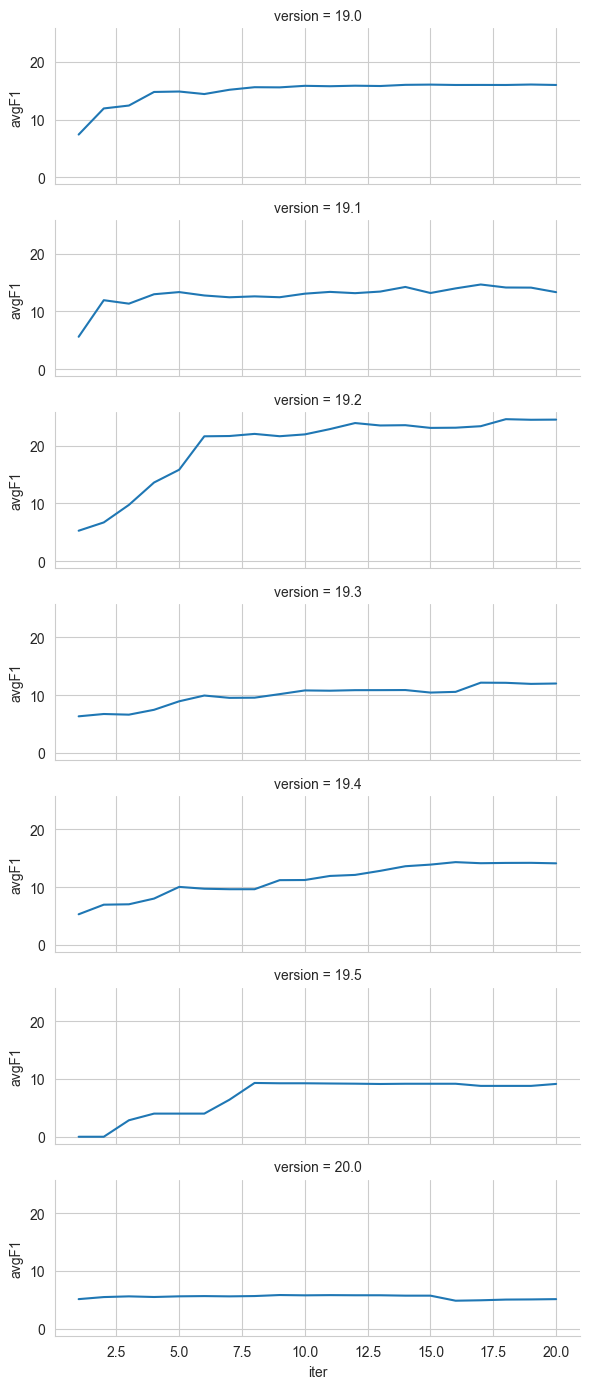

In [16]:
g = sns.FacetGrid(
    df_label_metrics[df_label_metrics["version"] >= 19],
    row = "version",
    height = 2,
    aspect = 3,
    # xlim=(1,10),
    # ylim=(55, 90)
)

# g.fig.suptitle("Métricas da seleção de componentes")
g.map(sns.lineplot, "iter", "avgF1")

plt.tight_layout()
plt.show()

# Métricas de treino do modelo

In [17]:
training_stats = []
for version_folder in df_iter_path["version_folder"].drop_duplicates():
    FILE_NAME = "training_stats.parquet"

    if FILE_NAME in os.listdir(version_folder):
        version_stats =  pd.read_parquet(join(version_folder, FILE_NAME)).assign(version_folder = version_folder)
        
        training_stats.append(
           version_stats
        )
        

df_train= pd.concat(training_stats)
df_train["version"] = df_train['version_folder'].str.split("/").str[-2].str.split("_").str[0].astype(float)

df_train = df_train.melt(
    id_vars = ["version_folder","version", "iter", "epoch", "train_loss" ],
    value_name = "f1-score",
    var_name = "class"
)

df_train["class"] = df_train["class"].str.split("_").str[-1]

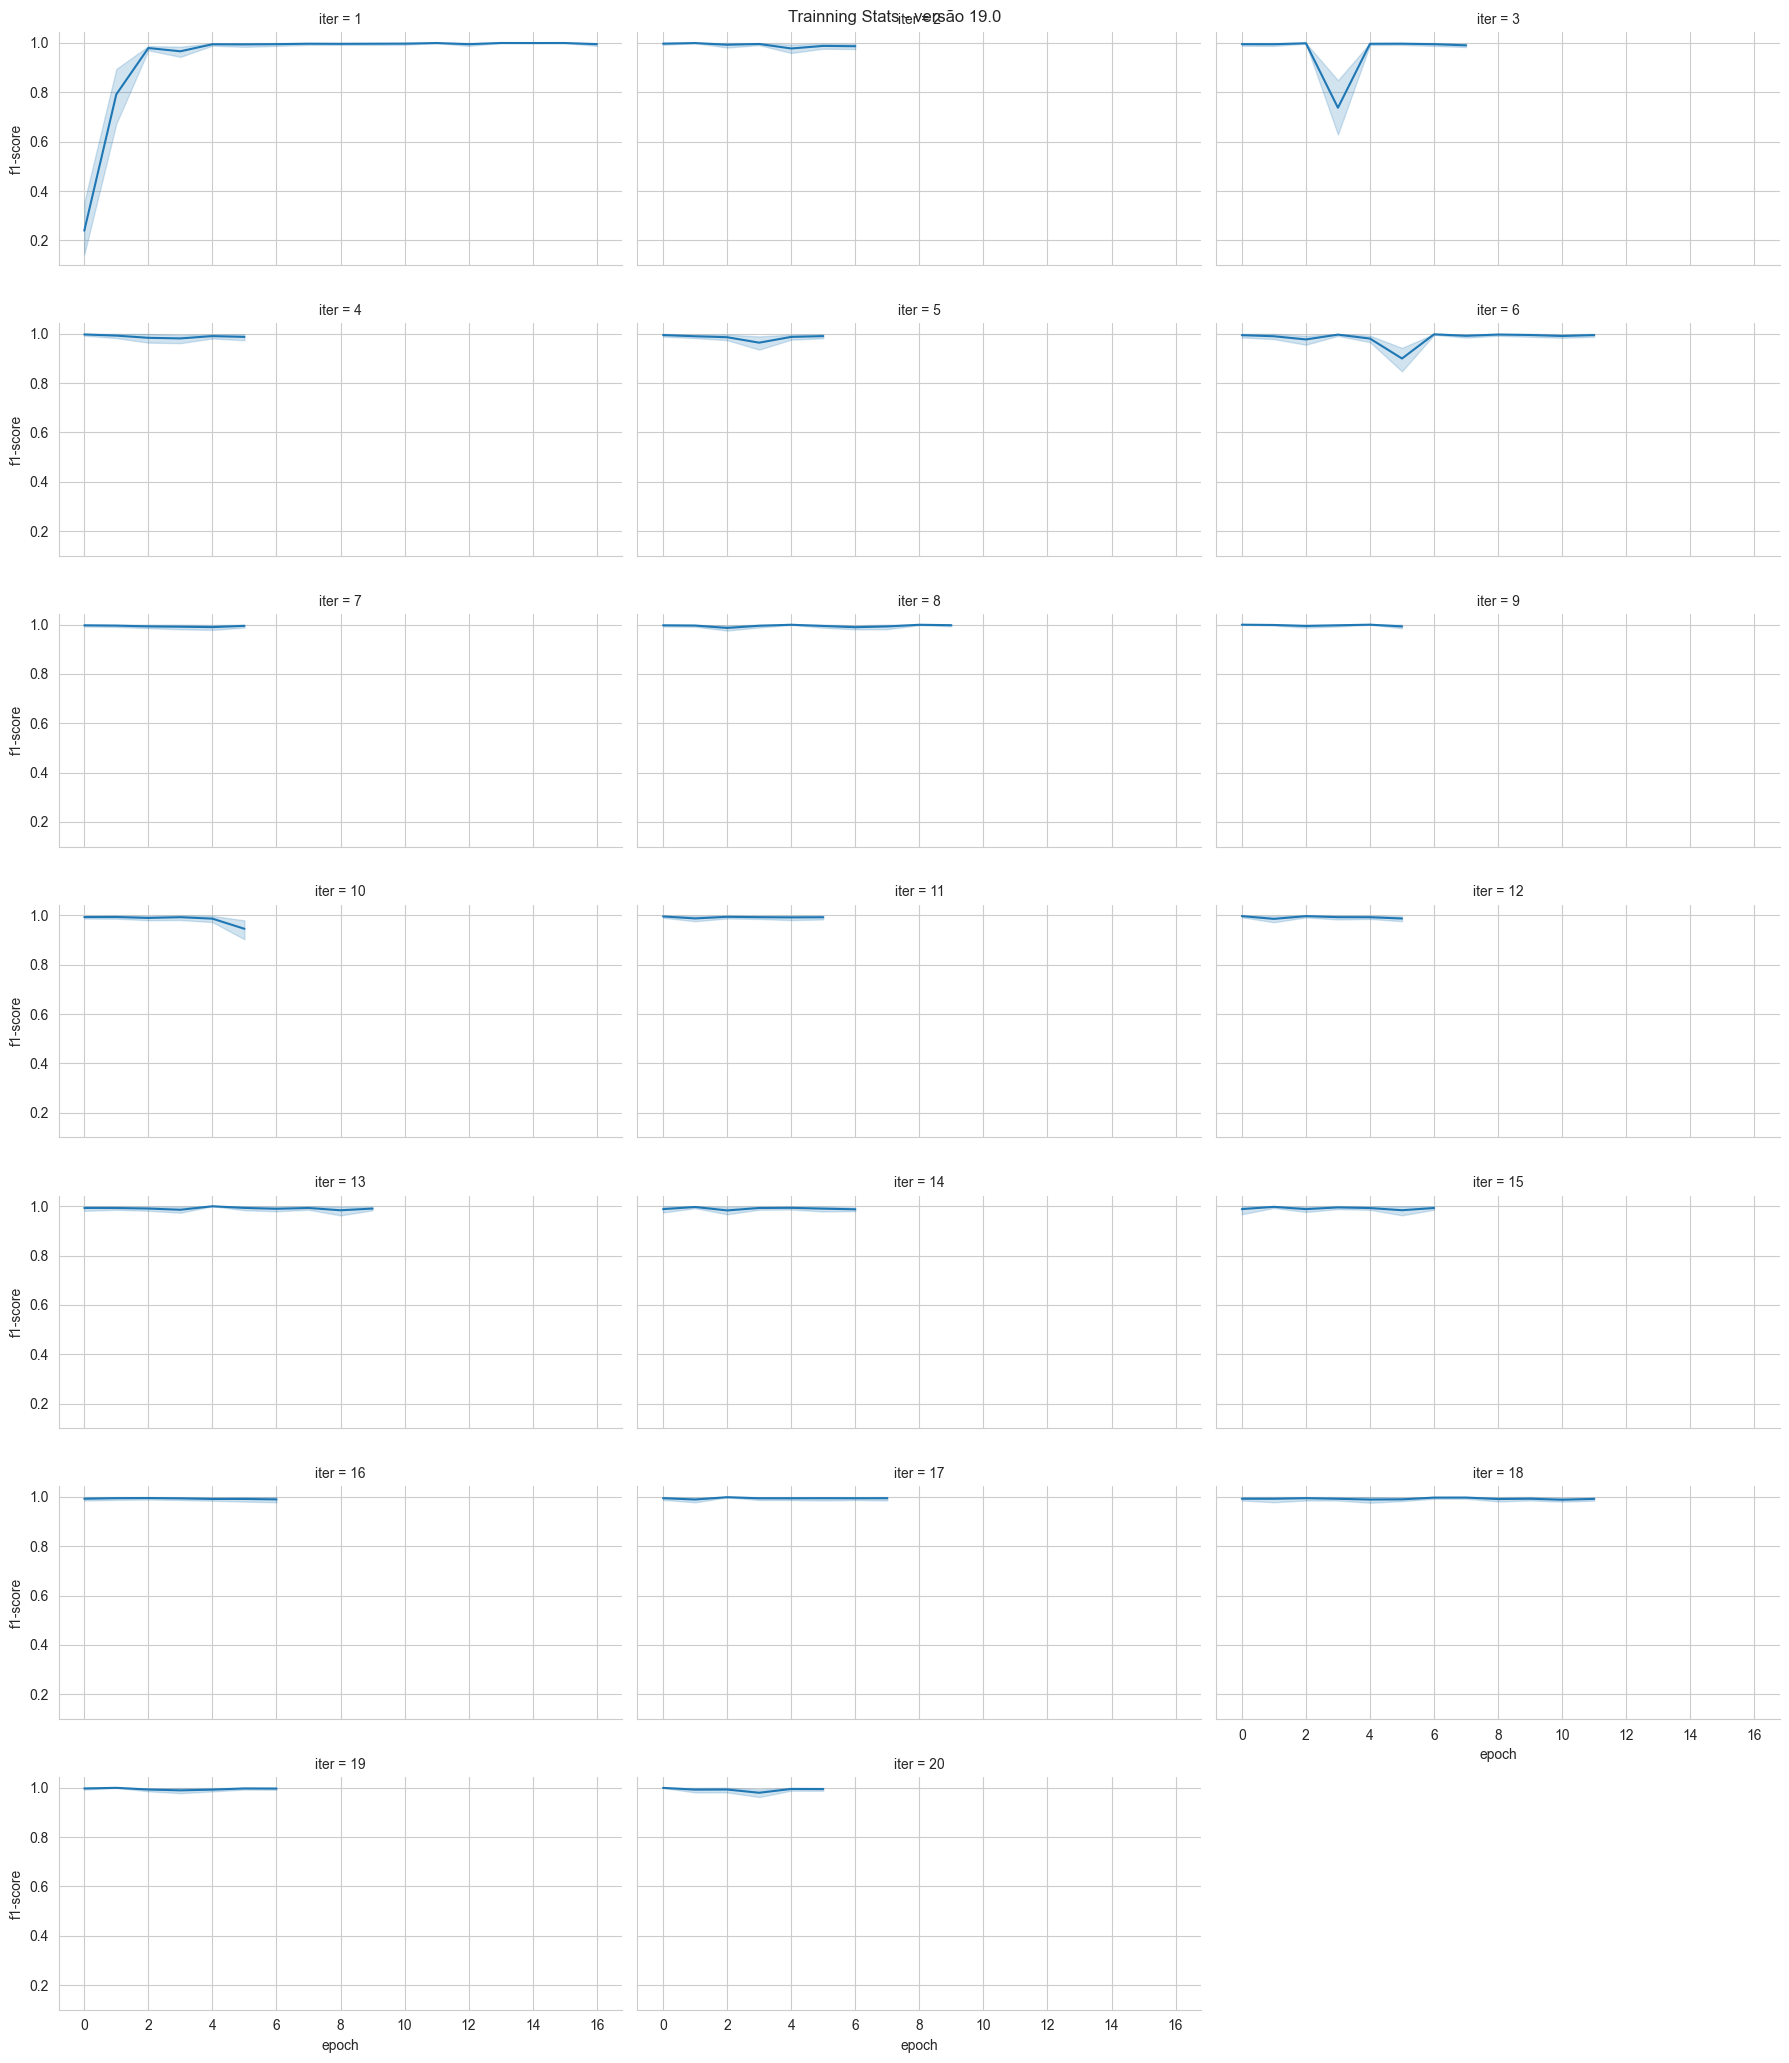

In [18]:
iter = 1
version = 19.0
g = sns.FacetGrid(
    df_train[(df_train["version"] == version)],
    col = "iter",
    height = 3,
    aspect = 2,
    col_wrap = 3
)

g.fig.suptitle(f"Trainning Stats - versão {version}")

g.map(sns.lineplot, "epoch", "f1-score")


plt.show()
